# Snow Pillows
http://cdec.water.ca.gov/dynamicapp/selectQuery

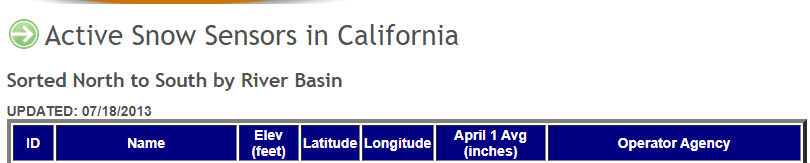

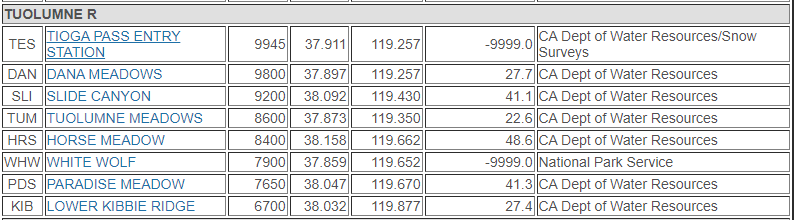

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import rasterio as rio
import matplotlib.dates as mdates
import geopandas as gpd

In [2]:
### Import Data and Clean

In [3]:
# Import data files from excel
snow_pillow_fp = 'data/Sites_All.csv'
snow_pillow = pd.read_csv(snow_pillow_fp)
snow_pillow.head()

,DateTime,TUM_in,SLI_in,DAN_in,TUM_m,SLI_m,DAN_m
0,11/1/2019,-1,0.0,0.0,-0.0254,0.0,0.0
1,11/2/2019,0,0.0,0.0,0.0000,0.0,0.0
2,11/3/2019,0,0.0,NaN,0.0000,0.0,NaN
3,11/4/2019,1,0.0,0.0,0.0254,0.0,0.0
4,11/5/2019,1,0.0,0.0,0.0254,0.0,0.0


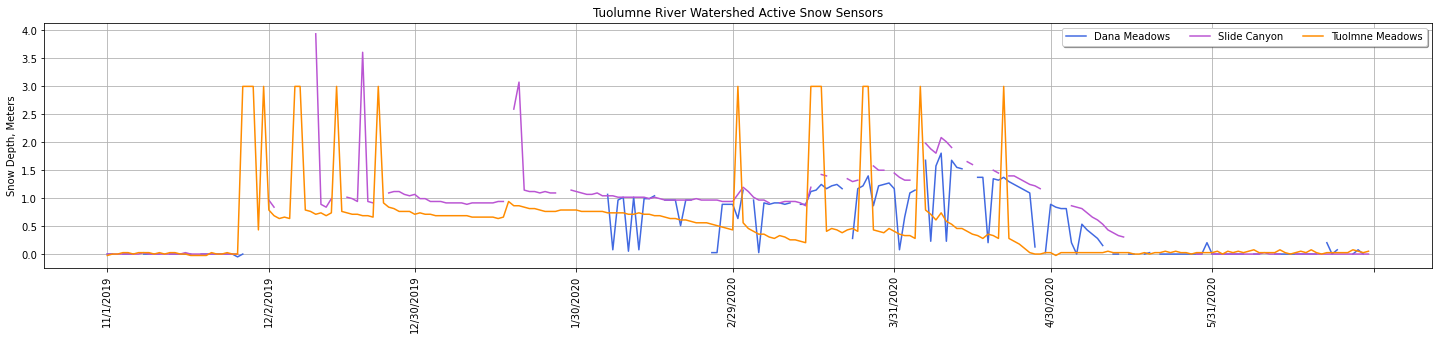

In [4]:
# A Plot Data (https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)
fig, ax = plt.subplots(figsize=(20,4))
fig.tight_layout()

ax.plot(snow_pillow['DateTime'], snow_pillow['DAN_m'], color='royalblue', markersize = 0 , linestyle = '-', label='Dana Meadows');
ax.plot(snow_pillow['DateTime'], snow_pillow['SLI_m'], color='mediumorchid', markersize = 0, linestyle = '-', label='Slide Canyon');
ax.plot(snow_pillow['DateTime'], snow_pillow['TUM_m'], color='darkorange', markersize = 0, linestyle = '-', label='Tuolmne Meadows');

ax.legend(loc='upper right', fancybox=True, shadow=True, ncol=5)

plt.grid()
ax.set_ylabel('Snow Depth, Meters');
ax.set_title('Tuolumne River Watershed Active Snow Sensors');
plt.xticks(rotation = 'vertical');
ax.xaxis.set_major_locator(mdates.MonthLocator())

### Geodata

In [5]:
# Import site locations file from excel
sp_sites = 'data/SnowPillows_TUOLUMNE.csv'

sp_df = pd.read_csv(sp_sites)
crs = {'init':'epsg:32611'}

sp_df.head()

,ID,Name,Elev (feet),Latitude,Longitude,April 1 Avg (inches),Operator Agency
0,TES,TIOGA PASS ENTRY STATION,9945,37.911,119.257,-9999.0,CA Dept of Water Resources/Snow Surveys
1,DAN,DANA MEADOWS,9800,37.897,119.257,27.7,CA Dept of Water Resources
2,SLI,SLIDE CANYON,9200,38.092,119.430,41.1,CA Dept of Water Resources
3,TUM,TUOLUMNE MEADOWS,8600,37.873,119.350,22.6,CA Dept of Water Resources
4,HRS,HORSE MEADOW,8400,38.158,119.662,48.6,CA Dept of Water Resources


In [6]:
# Map points
sp_geometry = [Point(xy) for xy in zip(sp_df["Longitude"], sp_df["Latitude"])]
sp_geometry[:3]

In [7]:
sp_geo_df = gpd.GeoDataFrame(sp_df, crs=crs, geometry = sp_geometry)
sp_geo_df.head()

/srv/conda/envs/notebook/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,ID,Name,Elev (feet),Latitude,Longitude,April 1 Avg (inches),Operator Agency,geometry
0,TES,TIOGA PASS ENTRY STATION,9945,37.911,119.257,-9999.0,CA Dept of Water Resources/Snow Surveys,POINT (119.25700 37.91100)
1,DAN,DANA MEADOWS,9800,37.897,119.257,27.7,CA Dept of Water Resources,POINT (119.25700 37.89700)
2,SLI,SLIDE CANYON,9200,38.092,119.430,41.1,CA Dept of Water Resources,POINT (119.43000 38.09200)
3,TUM,TUOLUMNE MEADOWS,8600,37.873,119.350,22.6,CA Dept of Water Resources,POINT (119.35000 37.87300)
4,HRS,HORSE MEADOW,8400,38.158,119.662,48.6,CA Dept of Water Resources,POINT (119.66200 38.15800)


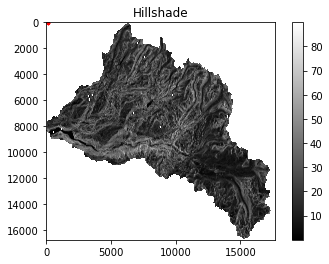

In [8]:
#Plot
hs_fn = 'data/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_gdaldem_hs.tif'
src_hs = rio.open(hs_fn)
hs = src_hs.read()
hs[hs == (-9999.)] = np.nan
hs[hs == (-0.)] = np.nan
src_hs.close

#Plot full range
f,ax = plt.subplots();
plt.imshow(hs.squeeze(), cmap='gray');
plt.colorbar();
ax.set_title('Hillshade');
#ax.add_artist(ScaleBar(1));
sp_geo_df.plot(ax=ax, markersize = 5, color = 'red');